# Equazioni  - Minimizzazione

In [66]:
#import all necessary modules
import numpy as np
import math

import matplotlib.pyplot as plt

## Equazioni Lineari

Partendo da un sistema di equazioni lienari:

$$
\begin{eqnarray}
a_{00} w  + a_{01} x + a_{02} y + a_{03} z & = & v_0 \\
a_{10} w  + a_{11} x + a_{12} y + a_{13} z & = & v_1 \\
a_{20} w  + a_{21} x + a_{22} y + a_{23} z & = & v_2 \\
a_{30} w  + a_{31} x + a_{32} y + a_{33} z & = & v_3\\
\end{eqnarray},
$$

possiamo rappresentarlo come
$$
A \; x = v
$$

dove:
$$
A = 
\begin{pmatrix}
a_{00} & a_{01} & a_{02} & a_{03} \\
a_{10} & a_{11} & a_{12} & a_{13} \\
a_{20} & a_{21} & a_{22} & a_{23} \\
a_{30} & a_{31} & a_{32} & a_{33} \\
 \end{pmatrix},
$$ 

$$ 
x =  
\begin{pmatrix}
 w \\ x\\ y\\ z\\
\end{pmatrix} 
$$

$$
v =
 \begin{pmatrix}
 v_0 \\ v_1\\ v_2\\ v_3\\
  \end{pmatrix} 
$$

Come esepio partiamo dal sistema:
    
$$
\begin{pmatrix}
 2 &  2 &  3 & -1 \\
 3 &  4 & -1 &  1 \\
 1 &  3 &  4 &  2 \\
-1 & -2 &  1 &  3 \\
 \end{pmatrix} 
 \begin{pmatrix}
 w \\ x\\ y\\ z\\
  \end{pmatrix} 
  =  \begin{pmatrix}
 -2 \\ 3\\ 2\\ 7\\
  \end{pmatrix} 
$$

### Elininazione di Gauss e Sostituzione

In [67]:
# Matrice A corrispondnete ai coefficienti delle equazioni
A = np.array([ [ 2, 2, 3,-1],
               [ 3, 4,-1, 1],
               [ 1, 3, 4, 2],
               [-1,-2, 1, 3] ], float)

# Vettore v corrsipondnete 
v = np.array( [ -2, 3, 2, 7], float)



Av = np.column_stack((A, v) )
Av

array([[ 2.,  2.,  3., -1., -2.],
       [ 3.,  4., -1.,  1.,  3.],
       [ 1.,  3.,  4.,  2.,  2.],
       [-1., -2.,  1.,  3.,  7.]])

In [68]:
Av[0]

array([ 2.,  2.,  3., -1., -2.])

In [69]:
# Divido la primariga per il valore del  termine Av[0,0] in modo da ottenere 1 
Av[0]=Av[0]/Av[0][0]

# Controllo la prima riga. Mi aspetto Av[0,0]=1
Av[0]

array([ 1. ,  1. ,  1.5, -0.5, -1. ])

In [70]:
Av

array([[ 1. ,  1. ,  1.5, -0.5, -1. ],
       [ 3. ,  4. , -1. ,  1. ,  3. ],
       [ 1. ,  3. ,  4. ,  2. ,  2. ],
       [-1. , -2. ,  1. ,  3. ,  7. ]])

In [71]:
# Una combinazione lineare di due righe (equazioni) da una equazione valida per il sistema.
# Sottraggo  alla seconda riga la prima moltiplicata per il primo elemento della seconda riga
# mi aspetto Av[1,0] = Av[1,0]-1*Av[1,0] =  0
Av[1] = Av[1]-Av[1][0]*Av[0]

Av[1]

array([ 0. ,  1. , -5.5,  2.5,  6. ])

In [72]:
Av

array([[ 1. ,  1. ,  1.5, -0.5, -1. ],
       [ 0. ,  1. , -5.5,  2.5,  6. ],
       [ 1. ,  3. ,  4. ,  2. ,  2. ],
       [-1. , -2. ,  1. ,  3. ,  7. ]])

In [73]:
#stesso procedimento per riga 3 e 4
Av[2] = Av[2]-Av[2][0]*Av[0]
Av[3] = Av[3]-Av[3][0]*Av[0]

# Mi aspetto che la prima colonna sia (1,0,0,0)
Av

array([[ 1. ,  1. ,  1.5, -0.5, -1. ],
       [ 0. ,  1. , -5.5,  2.5,  6. ],
       [ 0. ,  2. ,  2.5,  2.5,  3. ],
       [ 0. , -1. ,  2.5,  2.5,  6. ]])

In [74]:
# ripeto il procedimento a partire dalla seconda riga 
Av[1] = Av[1]/Av[1][1]

Av[2] = Av[2]-Av[2][1]*Av[1]
Av[3] = Av[3]-Av[3][1]*Av[1]

# Mi aspetto che gli ultimi tre elementi della seconda colonna siano  1,0,0
# quindi che la terza coloanna sia (a,1,0,0) dove a dipende dal caso specifico
Av

array([[ 1. ,  1. ,  1.5, -0.5, -1. ],
       [ 0. ,  1. , -5.5,  2.5,  6. ],
       [ 0. ,  0. , 13.5, -2.5, -9. ],
       [ 0. ,  0. , -3. ,  5. , 12. ]])

In [75]:
# ripeto il procedimento a partire dalla terza riga 

Av[2] = Av[2]/Av[2][2]

Av[3] = Av[3]-Av[3][2]*Av[2]
# Mi aspetto che la terza colonna sia  (b,c,1,0)
Av

array([[ 1.        ,  1.        ,  1.5       , -0.5       , -1.        ],
       [ 0.        ,  1.        , -5.5       ,  2.5       ,  6.        ],
       [ 0.        ,  0.        ,  1.        , -0.18518519, -0.66666667],
       [ 0.        ,  0.        ,  0.        ,  4.44444444, 10.        ]])

In [76]:
# infine la quarta riga
Av[3] = Av[3]/Av[3][3]

# Mi aspetto che la quarta colonna sia (d,e,f,1)
Av

array([[ 1.        ,  1.        ,  1.5       , -0.5       , -1.        ],
       [ 0.        ,  1.        , -5.5       ,  2.5       ,  6.        ],
       [ 0.        ,  0.        ,  1.        , -0.18518519, -0.66666667],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  2.25      ]])

Abbiamo ottenuto il sistema di equazioni:

$$ 
\begin{pmatrix}
1 & 1 & 1.5  & -0.5 \\
0 & 1 & -5.5 & 2.5   \\
0 & 0 & 1    & -0.18151 \\
0 & 0 & 0    & 1    \\
 \end{pmatrix} 
 \begin{pmatrix}
 w \\ x\\ y\\ z\\
  \end{pmatrix} 
  =  \begin{pmatrix}
 -1 \\ 6\\ -0.66666\\ 2.25\\
  \end{pmatrix} 
$$


$$ 
\begin{eqnarray}
w  + a_{01}x + a_{02}y + a_{03} z & = & v_0 \\
x + a_{12}y + a_{13}z & = & v_1 \\
y + a_{23}z & = & v_2 \\
z & = & v_3\\
\end{eqnarray}
$$

Sostituendo per ottenere le incognite:

$$ 
\begin{eqnarray}
z & = & v_3\\
y & = & v_2 - a_{23}z \\
x & = & v_1 -a_{12}y - a_{13}z  \\
w & = &  v_0 - a_{01}x + a_{02}y + a_{03} z  \\
\end{eqnarray}
$$

In [77]:
# Matrice triangolare con coefficenti del sistema
As = Av[:,:-1]
As


array([[ 1.        ,  1.        ,  1.5       , -0.5       ],
       [ 0.        ,  1.        , -5.5       ,  2.5       ],
       [ 0.        ,  0.        ,  1.        , -0.18518519],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [78]:
# Array con valori di v1,v2,v3,v4
vs = Av[:,-1]
vs

array([-1.        ,  6.        , -0.66666667,  2.25      ])

In [79]:
# Sostituzione
z = vs[3]
y = vs[2] -As[2,3]*z
x = vs[1] -As[1,2]*y -As[1,3]*z
w = vs[0] -As[0,1]*x-As[0,2]*y -As[0,3]*z

print(' w = {:}\n x = {:}\n y = {:}\n z = {:}'.format(w,x,y,z))

 w = 1.5
 x = -1.0
 y = -0.25
 z = 2.25


In [80]:
# controllo risultato
sol = np.array( [ w, x, y, z])

print( 'Eq 0 -->', np.sum(A[0]*sol) - v[0] )
print( 'Eq 1 -->', np.sum(A[1]*sol) - v[1] )
print( 'Eq 2 -->', np.sum(A[2]*sol) - v[2] )
print( 'Eq 3 -->', np.sum(A[3]*sol) - v[3] )

Eq 0 --> 0.0
Eq 1 --> 0.0
Eq 2 --> 0.0
Eq 3 --> 0.0


### Fattorizzazione LU 

Il metodo della fattorizzazione LU può essere utilizzato per automatizzare la procedura dell'eliminazione di Gauss.

Partendo dalla matrice
$$ 
{\bf A} = 
\begin{pmatrix}
a_{00} & a_{01} & a_{02} & a_{03} \\
a_{10} & a_{11} & a_{12} & a_{13} \\
a_{20} & a_{21} & a_{22} & a_{23} \\
a_{30} & a_{31} & a_{32} & a_{33} \\
 \end{pmatrix}
$$,

I passi dnell'eliminazone di Gauss che consistono nell'ottenere una prima colonna del tipo  

$$
\begin{pmatrix}
1 \\ 0\\ 0\\ 0\\
\end{pmatrix} 
$$
possono essre racchiusi nella seguente operazione:

$$ 
\frac{1}{a_{00}}
\begin{pmatrix}
1       & 0      & 0      & 0 \\
-a_{10} & a_{00} & 0      & 0 \\
-a_{20} & 0      & a_{00} & 0 \\
-a_{30} & 0      & a_{32} & a_{00} \\
 \end{pmatrix}
 \begin{pmatrix}
a_{00} & a_{01} & a_{02} & a_{03} \\
a_{10} & a_{11} & a_{12} & a_{13} \\
a_{20} & a_{21} & a_{22} & a_{23} \\
a_{30} & a_{31} & a_{32} & a_{33} \\
 \end{pmatrix}  
 = 
 \begin{pmatrix}
1 & b_{01} & b_{02} & b_{03} \\
0 & b_{11} & b_{12} & b_{13} \\
0 & b_{21} & b_{22} & b_{23} \\
0 & b_{31} & b_{32} & b_{33} \\
 \end{pmatrix}
$$

Possiamo definire la matrice ${\bf L_0}$:
$$
{\bf L_0} = \frac{1}{a_{00}} \;
\begin{pmatrix}
1       & 0      & 0      & 0 \\
-a_{10} & a_{00} & 0      & 0 \\
-a_{20} & 0      & a_{00} & 0 \\
-a_{30} & 0      & a_{32} & a_{00} \\
 \end{pmatrix}
$$

e rappresentare l'operazione precedente come:
$$
{\bf L_0 A} = {\bf B}
$$

dove:
$$
{\bf B} =  
 \begin{pmatrix}
1 & b_{01} & b_{02} & b_{03} \\
0 & b_{11} & b_{12} & b_{13} \\
0 & b_{21} & b_{22} & b_{23} \\
0 & b_{31} & b_{32} & b_{33} \\
 \end{pmatrix}
$$

$$
\frac{1}{b_{11}}
\begin{pmatrix}
b_{11} & 0      & 0      & 0 \\
0 & 1  & 0      & 0 \\
0 & -b_{21}  & b_{11}     & 0 \\
0 & -b_{31}  & 0      & b_{11} \\
 \end{pmatrix}
 \begin{pmatrix}
1 & b_{01} & b_{02} & b_{03} \\
0 & b_{11} & b_{12} & b_{13} \\
0 & b_{21} & b_{22} & b_{23} \\
0 & b_{31} & b_{32} & b_{33} \\
 \end{pmatrix}
 =
  \begin{pmatrix}
1 & c_{01} & c_{02} & c_{03} \\
0 & 1      & c_{12} & c_{13} \\
0 & 0      & c_{22} & c_{23} \\
0 & 0      & c_{32} & c_{33} \\
 \end{pmatrix}
 $$

Andando avanti in maniera analoga possiamo definire anche le matrici ${\bf L_1}$, ${\bf L_2}$,  ${\bf L_3}$ assieme a  ${\bf C}$ e ${\bf D}$:

$$
{\bf L1} = 
\frac{1}{b_{11}}
\begin{pmatrix}
b_{11} & 0      & 0      & 0 \\
0 & 1  & 0      & 0 \\
0 & -b_{21}  & b_{11}     & 0 \\
0 & -b_{31}  & 0      & b_{11} \\
 \end{pmatrix}
$$

$$
{\bf L_1 L_0 A} = {\bf C}
$$

$$
{\bf C} =    \begin{pmatrix}
1 & c_{01} & c_{02} & c_{03} \\
0 & 1      & c_{12} & c_{13} \\
0 & 0      & c_{22} & c_{23} \\
0 & 0      & c_{32} & c_{33} \\
 \end{pmatrix}
 $$

$$
{\bf L2} = 
\frac{1}{c_{22}}
\begin{pmatrix}
c_{22} & 0      & 0       & 0 \\
0      & c_{22} & 0       & 0 \\
0      & 0      & 1       & 0 \\
0      & 0      & -c_{32} & c_{22} \\
 \end{pmatrix}
$$


$$
{\bf L_2 L_1 L_0 A} = {\bf D}
$$


$$
{\bf L3} = 
\frac{1}{d_{33}}
\begin{pmatrix}
d_{33} & 0  & 0       & 0 \\
0      & d_{33}  & 0.      & 0 \\
0      & 0  & d_{33}  & 0 \\
0      & 0  &  & 2 \\
 \end{pmatrix}
$$

Quindi l'eqauzione iniziale
$$
{\bf A x} = {\bf v}
$$
diventa 
$$
{\bf L_3 L_2 L_1 L_0 A} = {\bf L_3 L_2 L_1 L_0 v}
$$

Definendo anche le matrici ${\bf L}$  ed ${\bf U}$ abbiamo:
$$
\begin{eqnarray}
{\bf L} & = & {\bf L_0^{-1}\, L_1^{-1}\, L_2^{-1}\, L_3 v^{-1}} \\
{\bf U} & = & {\bf L_3\; L_2\; L_1\; L_0 A}  \\
{\bf LU} & = & {\bf A} \\ 
\end{eqnarray}
$$

Ricavando le matrici inverse ${\bf L_0^{-1}}$ ...  ${\bf L_3^{-1}}$ otteniamo  ${\bf L}$:
$$
{\bf L} = 
\begin{pmatrix}
a_{00} & 0       & 0      & 0 \\
a_{10} & b_{11}  & 0      & 0 \\
a_{20} & b_{21}  & c_{22} & 0 \\
a_{30} & b_{31}  & c_{32} & d_{33} \\
 \end{pmatrix}
$$



L'equazone originale può essere espressa in funzine di ${\bf L}$ ed ${\bf U}$:
$$
{\bf Ax = v } \rightarrow {\bf LUx = v}
$$

Da notare che entrambi le matrici ${\bf L}$ ed ${\bf U}$ sono triangolari, rispettivamente inferiore e  superiore.

Per risolvere il sistema, una volta calcolate le matrici ${\bf L}$ e ${\bf U}$ che dipendono solo da ${\bf A}$ ma non da ${\bf v}$ possiamo risolvere ${\bf LU = v }$ per uno specifico vettore  ${\bf v}$ in tre passi:

- definiamo ${\bf U x} = {\bf y}$;
- otteniamo il sistema  ${\bf L y} = {\bf v}$ che, essendo ${\bf L}$ triangolare può essere risolta direttamente per sostituzione ottenendo la soluzione per il vettore ${\bf y}$;
- conoscendo ${\bf y}$ possiamo risolvere il sistema ${\bf U x} = {\bf y}$ direttamente per sostituzione poichè anche ${\bf U}$ è trangoilare.

### Numpy/Scipy  linalg 

Il metodo della fattorizzazione LU è molto usato per la risoluzione di sistemi lineari ed è implemnatto sia in `numpy` che in `scipy` che importa le funzionalita di `numpy` estendendole.

In [81]:
# Risolvo il sistema di equazioni tramine numpy.linalg.solve
xs = np.linalg.solve(A, v)
print('Soluzione numpy', xs)

Soluzione numpy [ 1.5  -1.   -0.25  2.25]


In [82]:
from scipy import linalg

# Risolvo il sistema di equazioni tramine scipy.linalg.solve
xsp = linalg.solve(A, v)
print('Soluzione scipy', xsp)

Soluzione scipy [ 1.5  -1.   -0.25  2.25]


## Equazioni Non Lineari

### Metodo del Rilassamento

Per equazioni non lienari si possono usare dei metodi iterativi come quello del Rilassamento che, assumendo di avere un'equazione della forma 
$$
x = f(x)
$$
consiste nell'ipotizzare un valore di partenza per $x$, calcolare la funzione e poi usare il risultato come input della funzione stessa. Si contunua ad usare il risultato come input in maniera iterativa. In alcuni casi il risultato converge ad un valore costante che corrisponde alla soluzione dell'equazione.

Proviamo con l'equazione:

$$
x = 2 - e^{-x}
$$

In [83]:
def myfun(x):
    """
    myfun(x)
    return 2-e^-x
    """
    return 2-math.exp(-x)

In [84]:
# parto dal valore 1000 e applico iterativamente il metodo del rilassamento
xx = 1000
for i in range(30):
    xx = myfun(xx)
    print(xx)

2.0
1.8646647167633872
1.8450518473052135
1.8419828720850022
1.8414971765224537
1.8414201737059899
1.8414079621425745
1.8414060254740223
1.8414057183297619
1.8414056696184309
1.8414056618930899
1.8414056606678946
1.8414056604735856
1.841405660442769
1.841405660437882
1.8414056604371067
1.8414056604369837
1.8414056604369642
1.841405660436961
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606
1.8414056604369606


In [85]:
# Provo la soluzione
sx = 1.8414056604369606
sx - myfun(sx)

0.0

La giustificazione matematica di questo proicedimento si ottiene attraverso l'espansione in serie di Taylor della funzione $f(x)$ attorno alla soluzione $x_s$ :

$$
f(x) = f(x_s) + (x-x_s) f'(x_s) + ...
$$

se prendiamo come nostra prima ipotesi $x_0$, trascurando itermini superiori al primo nell'espansione in serie,  otteniamo:
$$
x_1 = f(x_0) = f(x_s) + (x_0-x_s) f'(x_s),
$$

dato che per definizione $x_s = f(x_s)$ abbiamo:
$$ 
x_1 = x_s + (x_0-x_s) f'(x_s)   
$$
da cui:
$$
x_1-x_s = (x_0-x_s) f'(x_s)
$$
quindi se $|f'(x_s)| < 1 $ $x_1$ sarà più vicino alla soluzione di $x_0$. Ripetendo l'operazione otteniamo un numero sempre più vicino alla soluzione $x_s$.

Ovviamente se $|f'(x_s)| > 1$ il metodo non convergerà. In alcuni casi è possibile rimaneggaire l'equazione definendo una $f(x)$ che possa convergere. 


### Metodo della Bisezione

Il metodo della bisezione  si applica ad una equazione della forma:

$$
f(x) = 0
$$

ed in pratca trova una radice di $f(x)$.

Si parte da due valori di $x$ ($x_1, x_2$) per cui $f(x_1)$ e $f(x_2)$ hanno segno opposto.  Si calcola ip punto mediano $x_3 = \frac{x_1 +x_2}{2}$ e si seleziona il punto fra $f(x_1)$ e $f(x_2)$ che ha segno opposto a $f(x_3)$.
Si reitera il procedimento fino a che il valore di $f(x_N)$ sia minore  del limite prestabilito.

Proviamo il metodo con la finzione: $f(x) = 2 \cos{\frac{4+x}{10}} + \frac{1}{2}$

e quind all'equazione:

$$
 2 \cos{\frac{4+x}{10}} + \frac{1}{2} = 0.
$$

In [86]:
def fnltest(x):
    """
    fnltest(x) per test soluzione equazioni non lineari
    return 2 cos((4+x)/10) + 0.5
    """
    return 2*np.cos((4+x)/10) + 0.5

 dx: 13


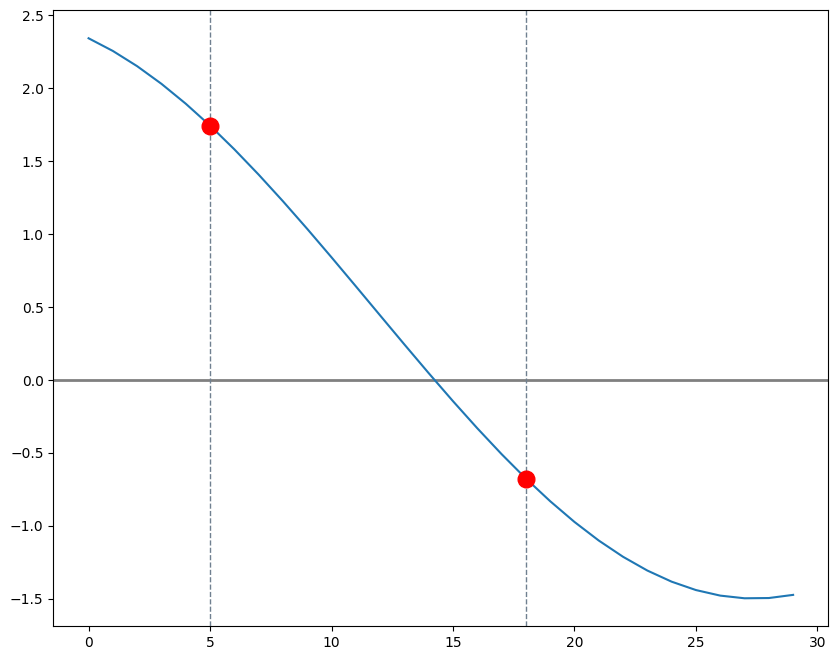

In [87]:
# Array valori x e y = f(x)
xx = np.arange(30)
yy = fnltest(xx)

# Seleziono i valori per x1 e x2: 5, 18
xp = np.array([ 5, 18]) # x1, x2
# Valori di y per x1 e x2
yp = fnltest(xp)

# Array con distanze fra i punti cosnderati
dxv = np.empty(0)


# Garfico funzione e punti (x1,y1), (x2,y2)
plt.subplots(figsize=(10,8))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xp[0], color='slategray', linewidth=1, linestyle='--')
plt.axvline(x=xp[1], color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy)
plt.plot(xp, yp, 'o', markersize=12, color='red')

print(' dx:', abs(xp[0]-xp[1]))

dxv = np.append(dxv, abs(xp[0]-xp[1]))

nuovo dx: 6.5


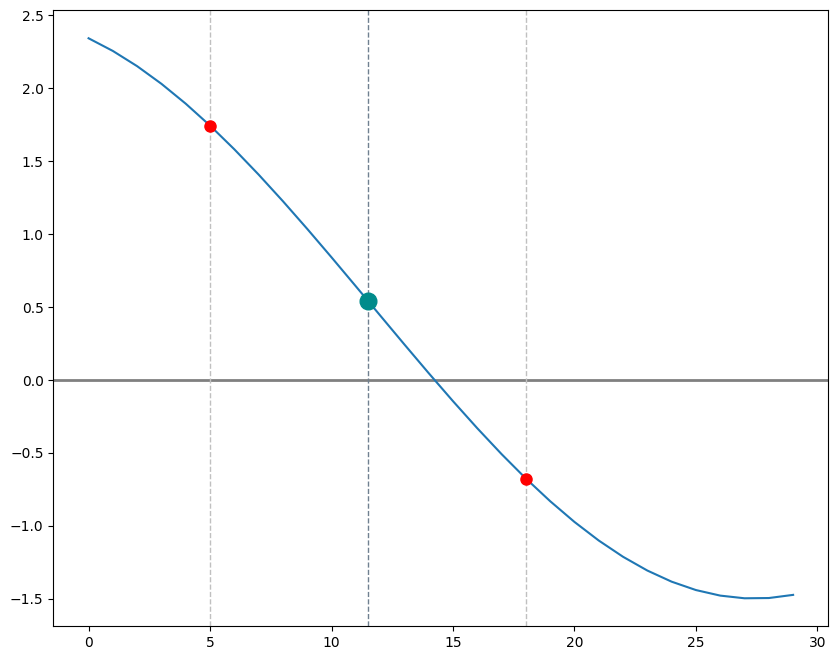

In [88]:
# Calcolo e grafico punto (x3,y3)
x3 = (xp[0]+xp[1])/2
y3 = fnltest(x3)

plt.subplots(figsize=(10,8))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xp[0], color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xp[1], color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=x3,    color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy)
plt.plot(xp, yp, 'o', markersize=8,  color='red')
plt.plot(x3, y3, 'o', markersize=12, color='darkcyan')

print('nuovo dx:', abs(x3-xp[1]))

dxv = np.append(dxv, abs(x3-xp[1]))

nuovo dx: 3.25


-0.09906701237914839

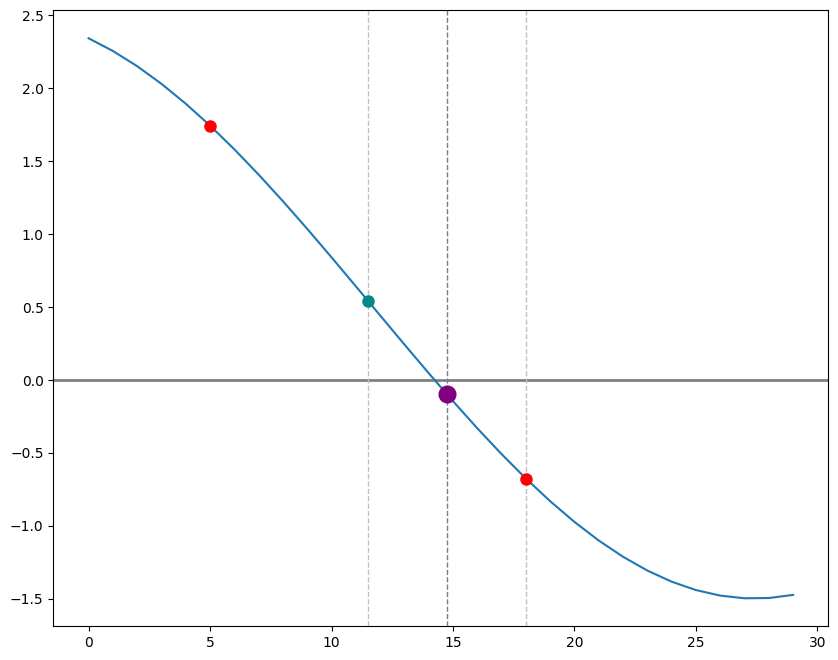

In [89]:
# y3 e y2 hanno segno opposto uso i punt 3 e 2 per ricavare x4
# Calcolo (x4,y4) e grafico di tutti i punti 
x4 = (x3+xp[1])/2
y4 = fnltest(x4)

plt.subplots(figsize=(10,8))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=x3,    color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xp[1], color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=x4,    color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy)
plt.plot(xp, yp, 'o', markersize=8,  color='red')
plt.plot(x3, y3, 'o', markersize=8,  color='darkcyan')
plt.plot(x4, y4, 'o', markersize=12, color='purple')

print('nuovo dx:', abs(x3-x4))
dxv = np.append(dxv, abs(x3-x4))
y4

nuovo dx: 1.625


0.21754016844780644

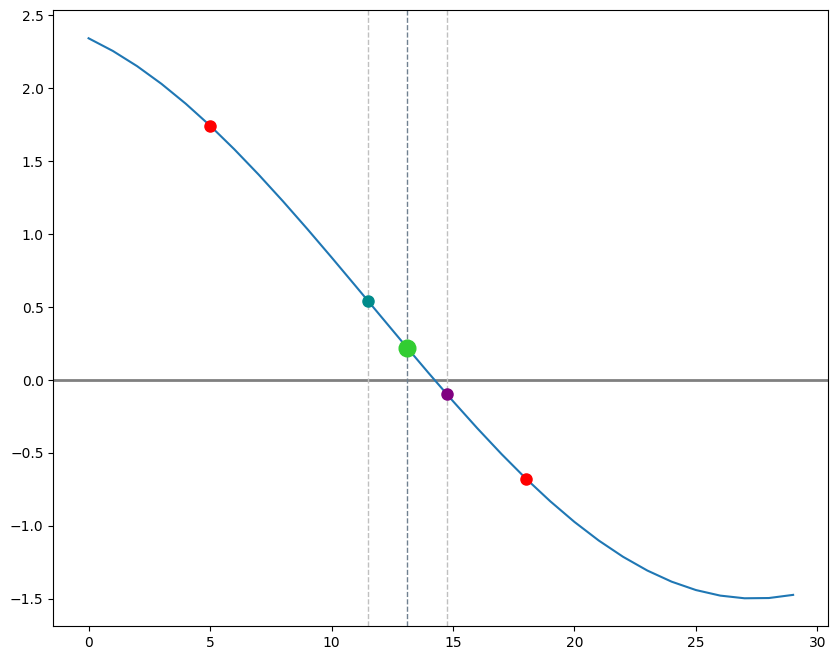

In [90]:
# y4 e y3 hanno segno opposto uso ipunt 3 e 4 per ricavare x5
# Calcolo (x5,y5) e grafico di tutti i punti
x5 = (x4+x3)/2
y5 = fnltest(x5)

plt.subplots(figsize=(10,8))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=x4, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=x3, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=x5, color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy)
plt.plot(xp, yp, 'o', markersize=8,  color='red')
plt.plot(x3, y3, 'o', markersize=8,  color='darkcyan')
plt.plot(x4, y4, 'o', markersize=8,  color='purple')
plt.plot(x5, y5, 'o', markersize=12, color='limegreen')

print('nuovo dx:', abs(x5-x4))
dxv = np.append(dxv, abs(x5-x4))

y5

nuovo dx: 0.8125


0.057777701800968806

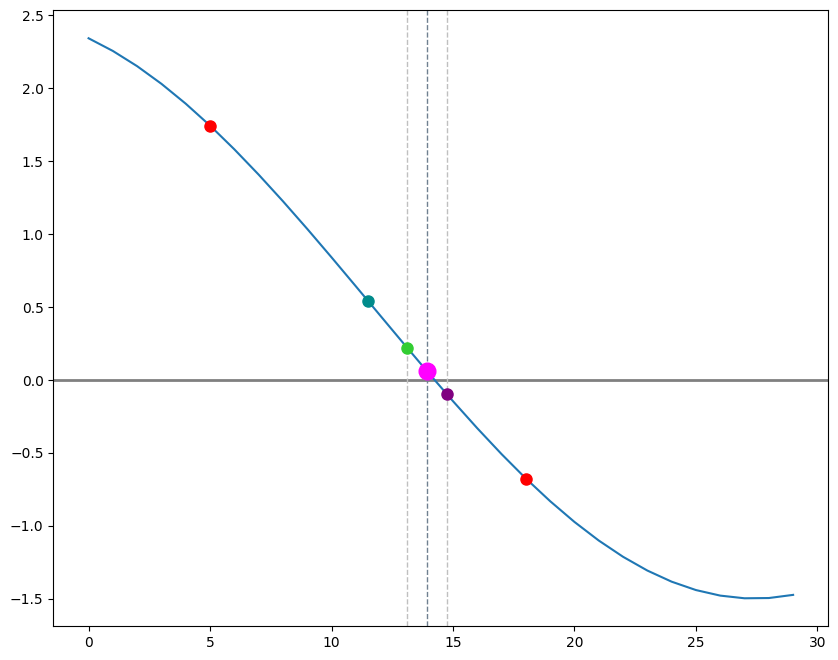

In [91]:
# y5 e y4 hanno segno opposto uso ipunt 4 e 5 per ricavare x6
# Calcolo (x6,y6) e grafico di tutti i punti
x6 = (x4+x5)/2
y6 = fnltest(x6)

plt.subplots(figsize=(10,8))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=x4, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=x5, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=x6, color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy)
plt.plot(xp, yp, 'o', markersize=8,  color='red')
plt.plot(x3, y3, 'o', markersize=8,  color='darkcyan')
plt.plot(x4, y4, 'o', markersize=8,  color='purple')
plt.plot(x5, y5, 'o', markersize=8,  color='limegreen')
plt.plot(x6, y6, 'o', markersize=12, color='magenta')

print('nuovo dx:', abs(x6-x5))
dxv = np.append(dxv, abs(x6-x5))

y6

nuovo dx 0.40625


-0.021074584459513157

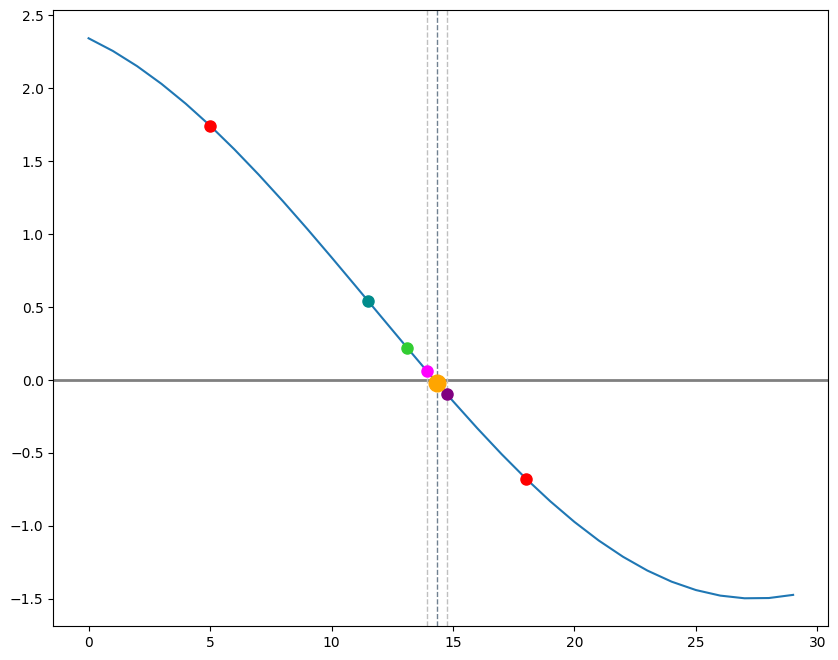

In [92]:
# y6 e y4 hanno segno opposto uso ipunt 4 e 6 per ricavare x7
# Calcolo (x7,y7) e grafico di tutti i punti
x7 = (x6+x4)/2
y7 = fnltest(x7)

plt.subplots(figsize=(10,8))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=x4, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=x6, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=x7, color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy)
plt.plot(xp, yp, 'o', markersize=8,  color='red')
plt.plot(x3, y3, 'o', markersize=8,  color='darkcyan')
plt.plot(x4, y4, 'o', markersize=8,  color='purple')
plt.plot(x5, y5, 'o', markersize=8,  color='limegreen')
plt.plot(x6, y6, 'o', markersize=8, color='magenta')
plt.plot(x7, y7, 'o', markersize=12, color='orange')

print('nuovo dx', abs(x7-x6))
dxv = np.append(dxv, abs(x7-x6))

y7

La ditsanza fra le $x$ dei due punti si dimezza ad ogni iterazione:
$$
\Delta x = \frac{\Delta_0 }{2^N}
$$
dove $ \Delta_0 = |x_1-x_0|$ è la distanza fra le $x$ scelte inizialmente e $N$ corrisponde la numero di iterazioni.

Le iterazioni possono essere interrotte quando la distanza fra le $x$ dei dui ultimi punti è minore dell'eroore prefissato $\epsilon$; assumendo che i punti da cionsiderare siano $x_N$ e  $x_{N-1}$ possiamo porre:
$$
|x_N - x_{N-1}| < \epsilon
$$

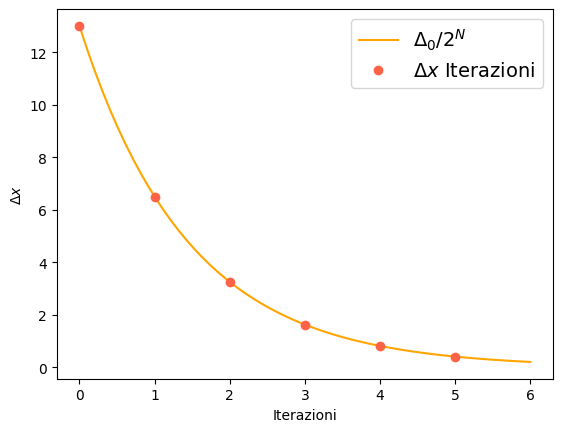

In [93]:

xdx = np.linspace(0, 6, 60)
ydx = dxv[0]/np.power(2,xdx)

plt.rcdefaults()
#plt.subplots(figsize=(10,8))
plt.plot(xdx, ydx, color='orange', label='$\Delta_0 / 2^N$')
plt.plot(dxv, 'o', color='tomato', label='$\Delta x$ Iterazioni')
plt.xlabel('Iterazioni')
plt.ylabel(r'$\Delta x$')
plt.legend(fontsize=14)


Possiamo anche calcolare il numero di iterazioni necessarie:

$$
N = log_2 \frac{\Delta_0}{\epsilon}.
$$

Il metodo della bisezione può fallire per funzini con un numero pari di radici 
e per funzioni con radici multple coincidenti che non passano da valori negativi a positivi o viceversa 
come ad esempio:
    
$$ 
f(x) = \left( x - 2 \right)^2
$$

inoltre non è estendibile a problemi con più variabili.

Text(0, 0.5, 'f(x)')

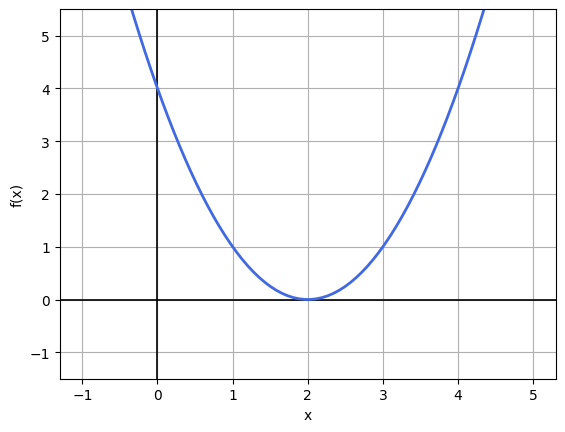

In [94]:
def fbisno(x):
    return np.power(x-2,2)


xbisno = np.linspace(-1, 5, 80)
ybisno = fbisno(xbisno)


plt.axhline(color='k', linewidth=1.2)
plt.axvline(color='k', linewidth=1.2)
plt.plot(xbisno, ybisno, color='royalblue', linewidth=2)
plt.ylim(-1.5, 5.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')

### Metodo di Newton

Il metodo di Newton è pplicabile come il metodo della bisezione a equazioni del tipo:
$$
f(x) = 0
$$

 si basa (con riferimento alla figura di seguito) sulla costatazione che 
$$
f'(x_0) = \frac{f(x_0)}{\Delta x}
$$

da cui per la ricera iterativa delle radici della funzione possiamo ricavare la coordianta $x$ del punto di prova successivo come:

$$ 
x_{1} = x_0 - \Delta x = x - \frac{f(x)}{f'(x)}
$$

per cui da un punto di partenza qualsiasi ($x_0$) conoiscendo la derivata della funzione $f'(x)$ possiamo trovare la radice della funzine $f(x)$ con l'approissimazione desiderata reiterando il calcolo per $x_i$ successivi.

In [95]:
# definisco la funzione corrispondente alla derivata della funzione di test
def fnltest_prime(x):
    """
    fnltest_prime(x) derivata della funzione definita in fnltest(x)
    return -2/10  sin((4+x)/10)
    """
    return -2*np.sin((4+x)/10)/10

yyp = fnltest_prime(xx)

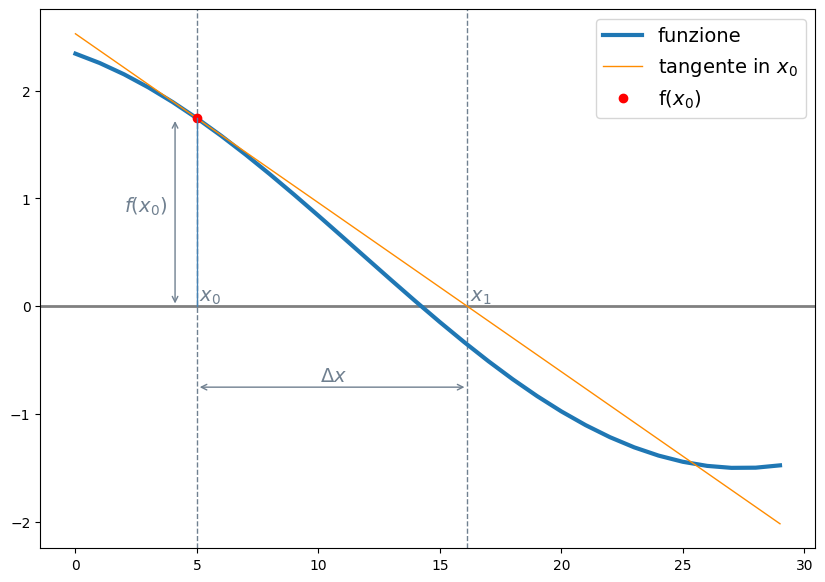

In [96]:
# Funzione e grafico per spieagre il metodo di Newton
fprime0 = fnltest_prime(xp[0])

tgy = yp[0] + fprime0*(xx-xp[0])
xn1 = xp[0] - yp[0]/fprime0
 

plt.subplots(figsize=(10,7))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xp[0], color='slategray', linewidth=1, linestyle='--')
plt.axvline(x=xn1,   color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy, linewidth=3,  label='funzione')
plt.plot(xx, tgy, color='darkorange', linewidth=1, label='tangente in $x_0$')
plt.plot(xp[0], yp[0], 'o', color='red',        label='f($x_0$)')
plt.plot((xp[0],xp[0]), (0,yp[0]) , color='steelblue' , linewidth=1)
#plt.plot(xn1, yn1,     'o', color='darkorange', label='$x_1$')

# testo x0 x1
plt.text(xp[0]+0.1, 0.05, '$x_0$', fontsize=14, color='slategray')
plt.text(xn1+0.1, 0.05,   '$x_1$', fontsize=14, color='slategray')

#freccie 
plt.annotate(text='', xy=(xp[0], -0.75), xytext=(xn1,-0.75), 
             arrowprops=dict(arrowstyle='<->', color='slategray'))
plt.annotate(text='', xy=(xp[0]-0.9, 0), xytext=(xp[0]-0.9,yp[0]), 
             arrowprops=dict(arrowstyle='<->', color='slategray'))

#testo Delta x, f(x0)
plt.text((xn1+xp[0])/2 -0.5, -0.70,   '$\Delta x$', fontsize=14, color='slategray')
plt.text((xp[0])-3, yp[0]/2,   '$f(x_0)$', fontsize=14, color='slategray')

plt.legend(fontsize=14)
plt.show()

delta x: 11.127027012070407


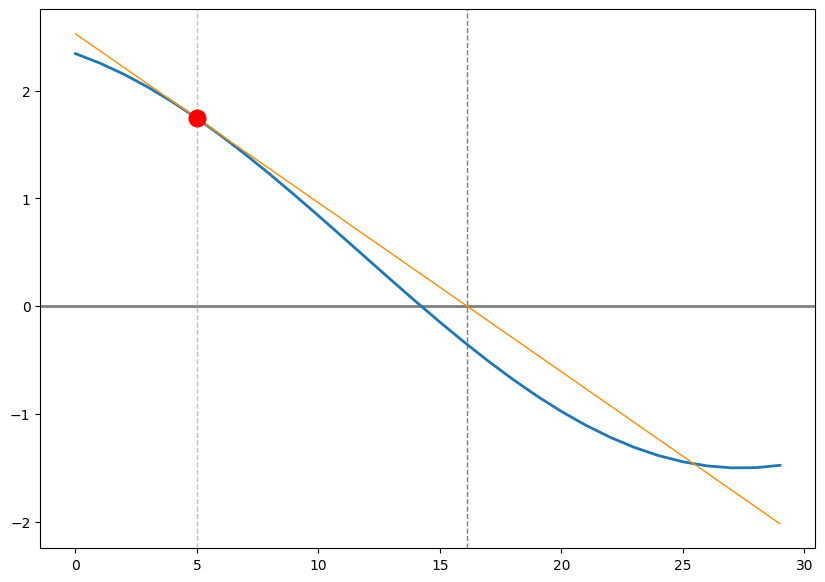

In [97]:
# Metodo Newton da punt x0 = 5 (stesso che per bisezione)
# Calcolo punto x1 e grafico
dxn = np.empty(0)

fprime0 = fnltest_prime(xp[0])

tgy = yp[0] + fprime0*(xx-xp[0])
xn1 = xp[0] - yp[0]/fprime0
yn1 = fnltest(xn1)

plt.subplots(figsize=(10,7))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xp[0], color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xn1,   color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy, linewidth=2)
plt.plot(xx,tgy, color='darkorange', linewidth=1 )
plt.plot(xp[0], yp[0], 'o', markersize=12, color='red')

dxn = np.append(dxn, abs(xp[0]-xn1))
print('delta x:', dxn[-1])

delta x: 1.9654387978900125


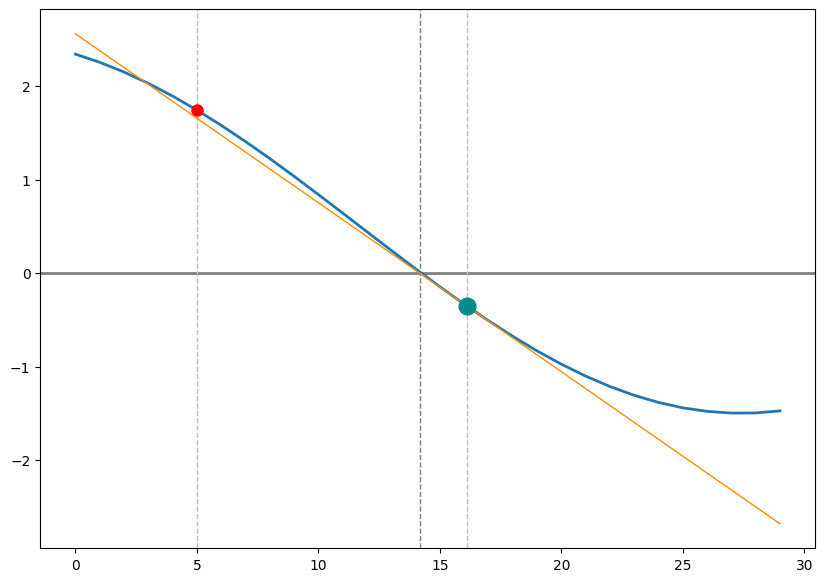

In [136]:
# Calcolo punto x2 e grafico
fprime1 = fnltest_prime(xn1)

tgy = yn1 + fprime1*(xx-xn1)
xn2 = xn1 - yn1/fprime1
yn2 = fnltest(xn2)

plt.subplots(figsize=(10,7))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xp[0], color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xn1,   color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xn2,   color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy, linewidth=2)
plt.plot(xx,tgy, color='darkorange', linewidth=1 )
plt.plot(xp[0], yp[0], 'o', markersize=8,  color='red')
plt.plot(xn1,   yn1,   'o', markersize=12, color='darkcyan')

dxn = np.append(dxn, abs(xn1-xn2))
print('delta x:', dxn[-1])

14.161588214180394 0.01418404318270472
delta x: 0.0731099061572813


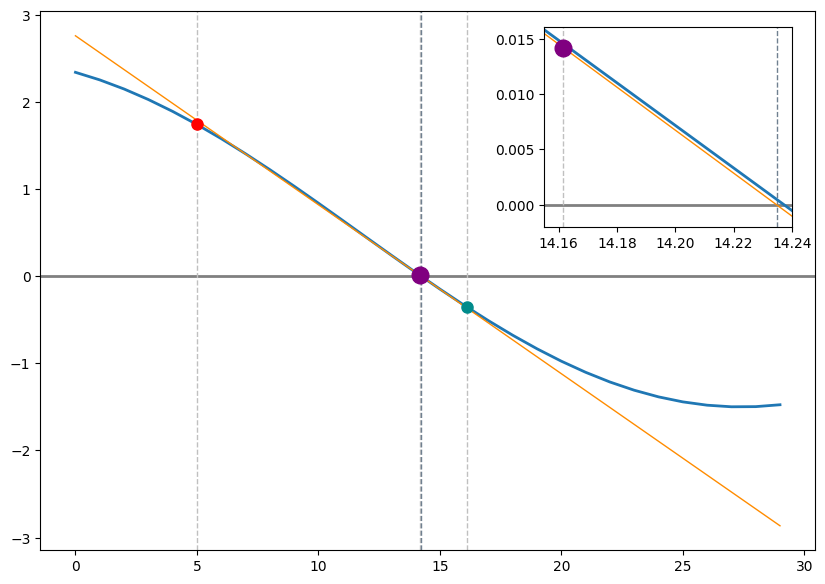

In [137]:
# Calcolo punto x4 e grafico
fprime2 = fnltest_prime(xn2)

tgy = yn2 + fprime2*(xx-xn2)
xn3 = xn2 - yn2/fprime2
yn3 = fnltest(xn3)

img, ax = plt.subplots(figsize=(10,7))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xp[0], color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xn1,   color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xn2,   color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xn3,   color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy, linewidth=2)
plt.plot(xx,tgy, color='darkorange', linewidth=1 )
plt.plot(xp[0], yp[0], 'o', markersize=8,  color='red')
plt.plot(xn1,   yn1,   'o', markersize=8, color='darkcyan')
plt.plot(xn2,   yn2,   'o', markersize=12,  color='purple')



ins = ax.inset_axes([0.65, 0.6, 0.32,0.37])
ins.axhline(color='gray', linewidth=2)
ins.axvline(x=xn2,   color='silver',    linewidth=1, linestyle='--')
ins.axvline(x=xn3,   color='slategray', linewidth=1, linestyle='--')
ins.plot(xx, yy, linewidth=2)
ins.plot(xx,tgy, color='darkorange', linewidth=1 )
ins.plot(xn2,   yn2,   'o', markersize=12,  color='purple')
ins.set_xlim(14.155,14.24)
ins.set_ylim(-0.002,0.016)

print(xn2,   yn2)
dxn = np.append(dxn, abs(xn3-xn2))
print('delta x:', dxn[-1])

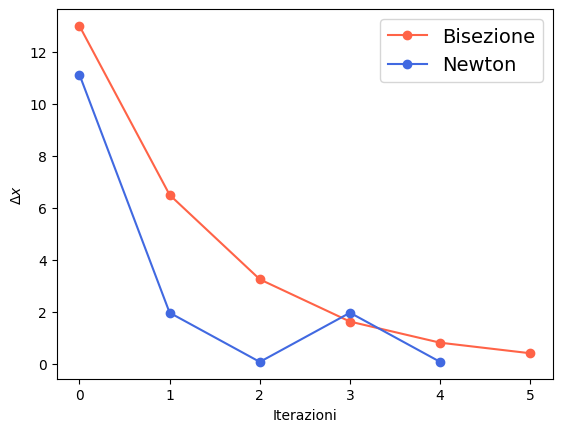

In [138]:
xdx = np.linspace(0, 6, 60)
ydx = dxv[0]/np.power(2,xdx)

# Grafico delta x per diversi metodi
plt.rcdefaults()
#plt.subplots(figsize=(10,8))
plt.plot(dxv, 'o-', color='tomato',    label='Bisezione')
plt.plot(dxn, 'o-', color='royalblue', label='Newton')
plt.xlabel('Iterazioni')
plt.ylabel(r'$\Delta x$')
plt.legend(fontsize=14)

### Metodo della Secante

Il metodo di Newton necessita di conoscere analiticamente la derivata della funzione di cui si vogliono trovare le radici, nel caso in cui si hanno a disposizione dei punti $(x,y)$ ma non si conosce la forma funzionale di $f(x)$,  non è applicabile.

Si può aggirare il problema calcolando la derivata in maniera numerica direttamenete dai dati. Il metodo della secante utilizza  due punti successivi del processo iterativo per calcolare la derivata. Per iniziare è necessario partire da due punti che, contrariamente al metodo della bisezione, non devono essere su lati opposti dell'asse $x$. 

Partendo dai punti iniziali  $x_0$ e $x_1$ possiamo approssimare la derivata in $x_1$ come:

$$ 
f'(x_1) = \frac{f(x_1) - f(x_0)}{x_1 - x_0}
$$

da cui applicando lo stesso ragionamento del metodo di Newton:

$$
x_2 = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0)}
$$

delta x: 16.77607348640139


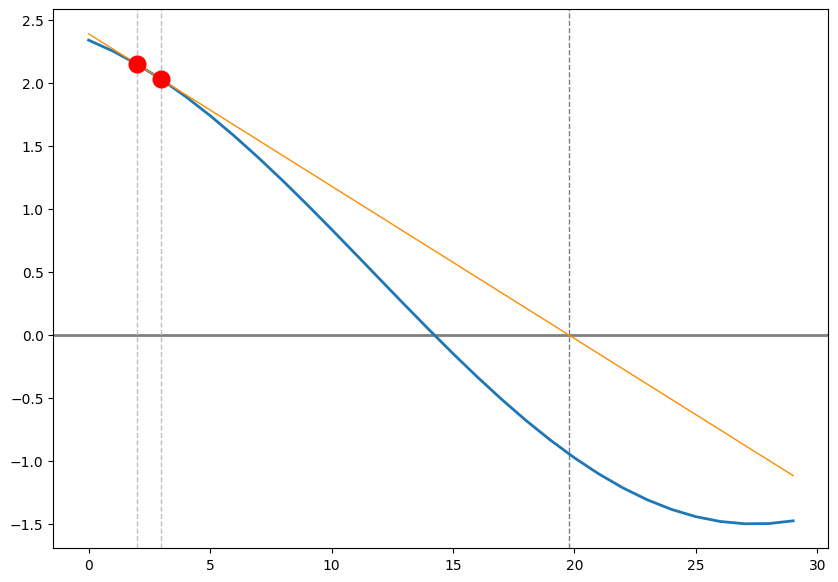

In [139]:
dxsec = np.empty(0)

# definisco x0 e x1 in maniera casuale
xsec0 = 2
xsec1 = 3

fprime1 = ( fnltest(xsec1) -  fnltest(xsec0) ) / (xsec1 - xsec0)

tgy = fnltest(xsec1) + fprime1*(xx-xsec1)

xsec2 = xsec1 - fnltest(xsec1)/fprime1
ysec2 = fnltest(xsec2)

plt.subplots(figsize=(10,7))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xsec0, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xsec1, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xsec2,   color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy, linewidth=2)
plt.plot(xx,tgy, color='darkorange', linewidth=1 )
plt.plot((xsec0, xsec1), ( fnltest(xsec0), fnltest(xsec1) ), 'o', markersize=12, color='red')

dxsec = np.append(dxsec, abs(xsec1-xsec2))
print('delta x:', dxsec[-1])

delta x: 5.326238757645687


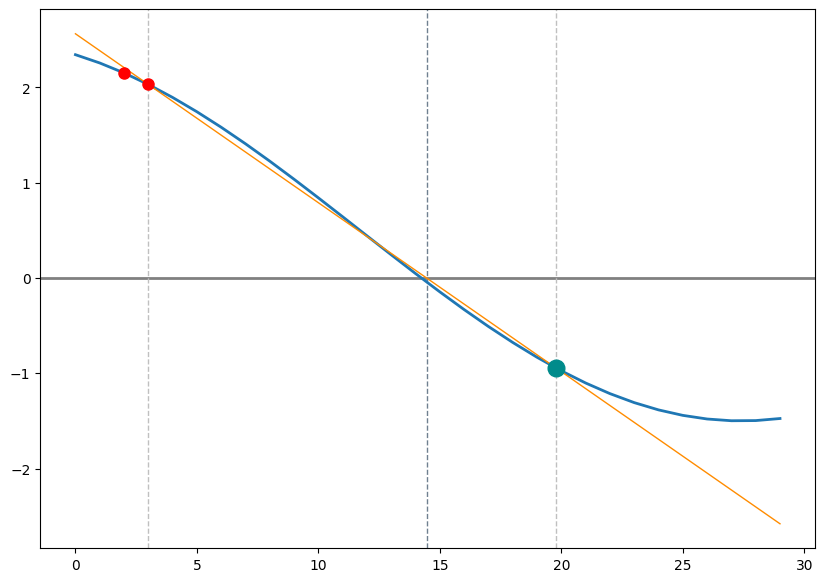

In [140]:
# Utilizzo i punt xsec2 e xsec1 per ricavare xsec3 
fprime2 = ( fnltest(xsec2) -  fnltest(xsec1) ) / (xsec2 - xsec1)

tgy = fnltest(xsec2) + fprime2*(xx-xsec2)

xsec3 = xsec2 - fnltest(xsec2)/fprime2
ysec3 = fnltest(xsec2)

plt.subplots(figsize=(10,7))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xsec1, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xsec2, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xsec3, color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy, linewidth=2)
plt.plot(xx,tgy, color='darkorange', linewidth=1 )
plt.plot((xsec0, xsec1), ( fnltest(xsec0), fnltest(xsec1) ), 'o', markersize=8, color='red')
plt.plot(xsec2, fnltest(xsec2),                              'o', markersize=12, color='darkcyan')

dxsec = np.append(dxsec, abs(xsec2-xsec3))
print('delta x:', dxsec[-1])

delta x: 0.2450519312558086


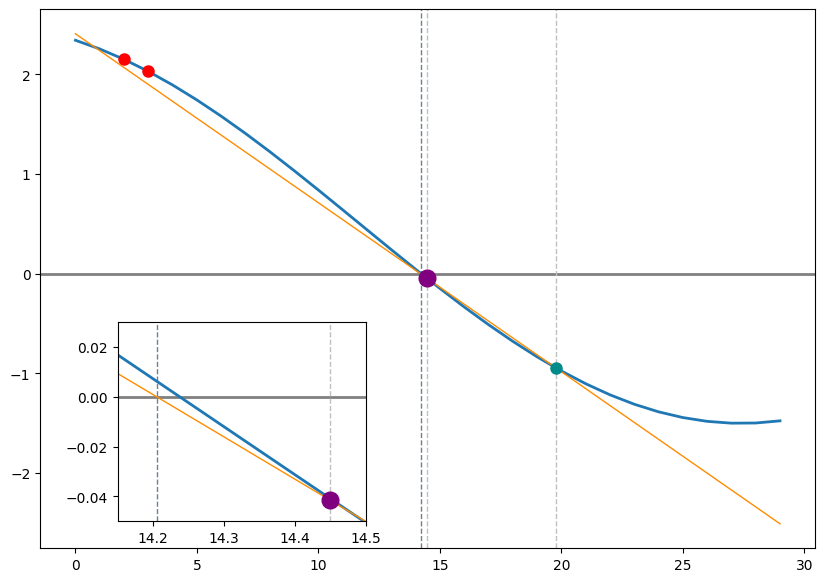

In [141]:
# Utilizzo i punt xsec2 e xsec3 per ricavare xsec4
fprime3 = ( fnltest(xsec3) -  fnltest(xsec2) ) / (xsec3 - xsec2)

tgy = fnltest(xsec3) + fprime3*(xx-xsec3)

xsec4 = xsec3 - fnltest(xsec3)/fprime3
ysec4 = fnltest(xsec3)

fig,ax = plt.subplots(figsize=(10,7))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xsec2, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xsec3, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xsec4, color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy, linewidth=2)
plt.plot(xx,tgy, color='darkorange', linewidth=1 )
plt.plot((xsec0, xsec1), ( fnltest(xsec0), fnltest(xsec1) ), 'o', markersize=8, color='red')
plt.plot(xsec2, fnltest(xsec2),                              'o', markersize=8, color='darkcyan')
plt.plot(xsec3, fnltest(xsec3),                              'o', markersize=12, color='purple')



ins = ax.inset_axes([0.1, 0.05, 0.32,0.37])
ins.axhline(color='gray', linewidth=2)
ins.axvline(x=xsec3,   color='silver',    linewidth=1, linestyle='--')
ins.axvline(x=xsec4,   color='slategray', linewidth=1, linestyle='--')
ins.plot(xx, yy, linewidth=2)
ins.plot(xx,tgy, color='darkorange', linewidth=1 )
ins.plot(xsec3,   fnltest(xsec3),   'o', markersize=12,  color='purple')
ins.set_xlim(14.15,14.5)
ins.set_ylim(-0.05,0.03)


dxsec = np.append(dxsec, abs(xsec3-xsec4))
print('delta x:', dxsec[-1])

delta x: 0.2450519312558086


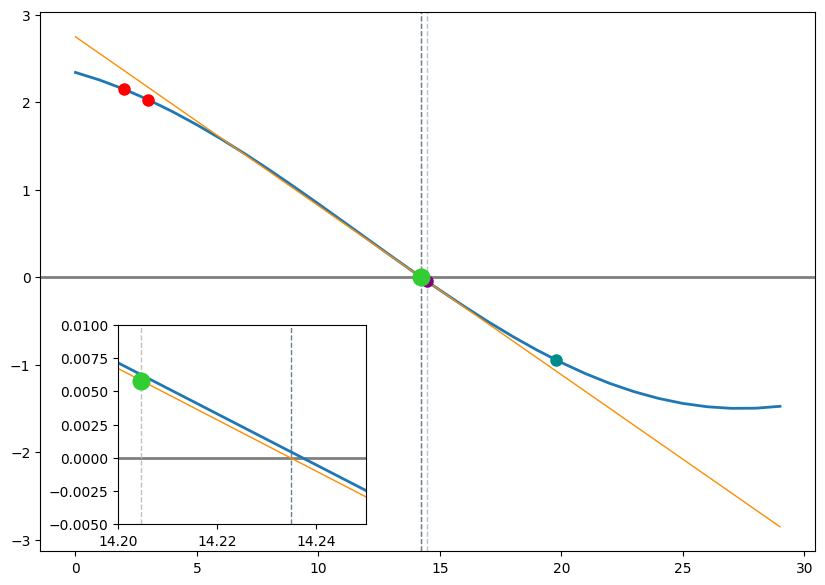

In [142]:
# Utilizzo i punt xsec3 e xsec4 per ricavare xsec5
fprime4 = ( fnltest(xsec4) -  fnltest(xsec3) ) / (xsec4 - xsec3)

tgy = fnltest(xsec4) + fprime4*(xx-xsec4)

xsec5 = xsec4 - fnltest(xsec4)/fprime4
ysec5 = fnltest(xsec4)

fig,ax = plt.subplots(figsize=(10,7))
plt.axhline(color='gray', linewidth=2)
plt.axvline(x=xsec3, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xsec4, color='silver',    linewidth=1, linestyle='--')
plt.axvline(x=xsec5, color='slategray', linewidth=1, linestyle='--')
plt.plot(xx, yy, linewidth=2)
plt.plot(xx,tgy, color='darkorange', linewidth=1 )
plt.plot((xsec0, xsec1), ( fnltest(xsec0), fnltest(xsec1) ), 'o', markersize=8, color='red')
plt.plot(xsec2, fnltest(xsec2),                              'o', markersize=8, color='darkcyan')
plt.plot(xsec3, fnltest(xsec3),                              'o', markersize=8, color='purple')
plt.plot(xsec4, fnltest(xsec4),                              'o', markersize=12,color='limegreen')


ins = ax.inset_axes([0.1, 0.05, 0.32,0.37])
ins.axhline(color='gray', linewidth=2)
ins.axvline(x=xsec4,   color='silver',    linewidth=1, linestyle='--')
ins.axvline(x=xsec5,   color='slategray', linewidth=1, linestyle='--')
ins.plot(xx, yy, linewidth=2)
ins.plot(xx,tgy, color='darkorange', linewidth=1 )
ins.plot(xsec4,   fnltest(xsec4),   'o', markersize=12,  color='limegreen')
ins.set_xlim(14.20,14.25)
ins.set_ylim(-0.005,0.01)


dxsec = np.append(dxsec, abs(xsec3-xsec4))
print('delta x:', dxsec[-1])

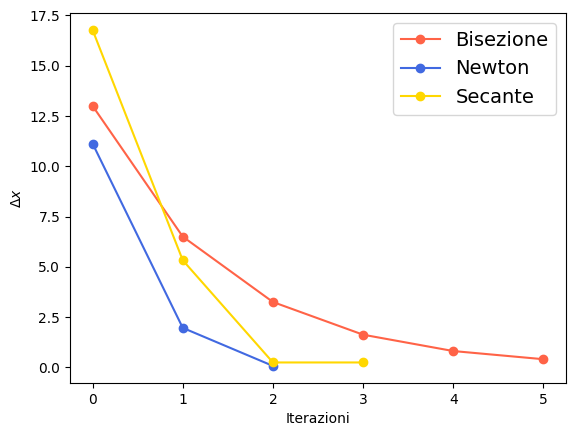

In [105]:
# Grafico delta x per diversi metodi 

#plt.subplots(figsize=(10,8))
plt.plot(dxv,   'o-', color='tomato',    label='Bisezione')
plt.plot(dxn,   'o-', color='royalblue', label='Newton')
plt.plot(dxsec, 'o-', color='gold',      label='Secante')
plt.xlabel('Iterazioni')
plt.ylabel(r'$\Delta x$')
plt.legend(fontsize=14)

## Minimizzazione

Molti problemi in fisica riguardano l'individuazione del minimo o massimo di una funzione.

Generalmente si parla di trovare il minimo di una funzione $f(x)$ (minimizzazione), trovare il massimo di $f(x)$ corrisponde a trovare il minimo di $-f(x)$.

Le tecniche per ceracre il minimo di una funzione sono legate a quelle utilizzate per risolvere equazioni, lineari e non.

### Regressione Lineare



Nel caso in cui la funzione di cui si vuole trovare il minimo sia lineare (o linearizzabile) rispetto ai parametri liberi da ottimizzare si possono porre le derivate prime rispoetto ai parametri pari a zero e risolvere il sistema. 

Assumiamo di avere iuna serie di dati $(x_i, y_i)$:

In [106]:
xlr = np.array( [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] )
ylr = np.array( [24, 21, 20, 15, 18, 14, 10, 10,  9,  4] )

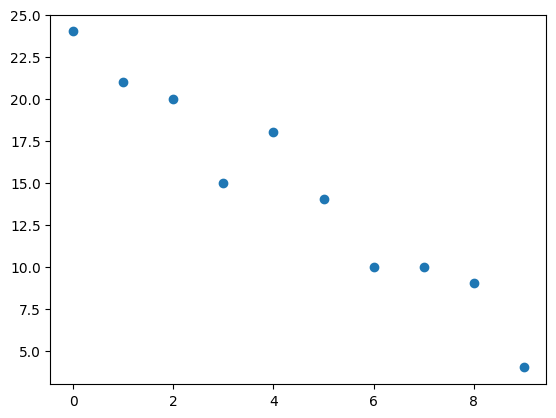

In [107]:
plt.plot(xlr, ylr, 'o')

Assumiamo anche di voler trovare i parametri $a$ e $b$ dell la funzione $F(x) = ax + b $ che meglio descrivono i punti.

Per ogni punto $(x_i, y_i)$ ci aspettiamo che $\left( y_i - (a x_i + b ) \right)^2$ sia vicino a zero e abbia un minimo quando $y_i$ è esattamente uguale a $a x_i + b $.

Possiamo quindi definire la somma degli scarti:

$$
S(a,b) = \sum_{i} \left(y_{i} - a x_i - b\right)^2. 
$$

I parametri che meglio descivono i dati corrisponderanno a quelli che minimizzano la somma degli scarti $S(a,b)$.
Possiamo quindi derivare $S(a,b)$ rispetto ai parametri $a$ e $b$ per poi imporre che le derivate  siano uguali a zero e risolvere il sistema:

$$
\begin{eqnarray}
\frac{\partial S}{\partial a} &= & \sum_{i=1}^n-2(y_i - ax_i -b)\,x_i & = & 2 \left(a\sum_{i=1}^n x_i^2 + b\sum_{i=1}^n x_i - \sum_{i=1}^n x_i y_i \right) &= & 0\\
\frac{\partial S}{\partial b} &= & \sum_{i=1}^n -2(y_i - a x_i -b) & = & 2 \left(a\sum_{i=1}^n x_i  +nb - \sum_{i=1}^n y_i \right) & = & 0 \\ 
\end{eqnarray}
$$

Divdendo per $2n$ e definendo $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$ e $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$
otteniamo:

$$
\begin{eqnarray}
a\frac{1}{n}\sum_{i=1}^n x_i^2 + b\bar{x}  &= & \frac{1}{n}\sum_{i=1}^n x_i y_i\\
a\bar{x} +b  &= & \bar{y}
\end{eqnarray}
$$


Con alcuni passaggi e notando che $n\bar{x}=\sum_{i=1}^n x_i$  $n\bar{y}=\sum_{i-1}n^1 y_i$  si possono ricavare i paramtri $a$ e $b$:

$$
\begin{eqnarray}
a & = & \frac{\sum_{i}(x_{i}- \bar{x})\,y_{i}} {\sum_{i}(x_{i}- \bar{x})\,x_{i}} \\ 
b & = & \bar{y} - a\bar{x}
\end{eqnarray}
$$

Applichiamo il risultato ai punti definiti sopra.

In [108]:
# Ricavo valori preliminari  xmean e ymean 
xmean = xlr.mean()
ymean = ylr.mean()

# calocolo  numeratore e denomitaro per parametro a
a_num = np.sum( (xlr - xmean) * ylr )
a_det = np.sum( (xlr - xmean) * xlr )

# parametri a e b 
a = a_num / a_det
b = ymean -a*xmean

print('a: {:}, b: {:}'.format(a, b))

a: -2.018181818181818, b: 23.581818181818182


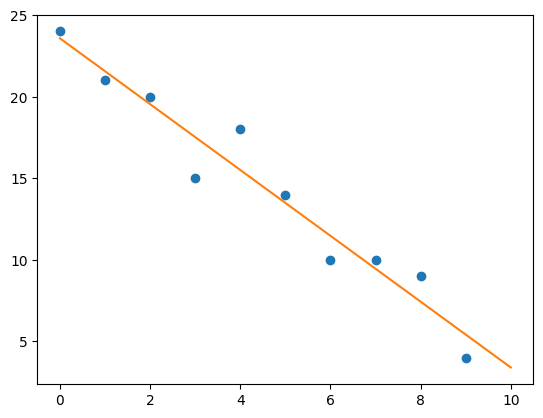

In [109]:
# Test risultato
xtest = np.linspace(0,10, 100)
ytest = a*xtest +b

plt.plot(xlr, ylr, 'o'    )
plt.plot(xtest, ytest, '-')

Il metodo può essere esteso consioderando gli errori per i punt $y_i$ ($\sigma_i$) minimizzando il $\chi^2$ invece che la semplice somma degli scarti. Per il nostro esempio corrisponderebbe a:

$$\chi^2(a,b) = \sum_{i=1}^n \left(\frac{y_i - a x_i -b } {\sigma_i}\right)^2\;. $$

Inoltre il metodo può essere esteso ai casi in cui la funzione da minimizzare può essere manipolata in modo da diventare lineare rispetto a  paramtri liberi. 


### Metodo di Gauss-Newton

Uscendo dal caso specifico delle funzioni lineari, il minimo o massimo di una funzione può essere individuato nel punto in cui la derivata si annulla:

$$
f'(x) = 0
$$

che corrisponde a trovare la radice di $f'(x)$.

Il metodo di Gauss-Newton consiste nell'applicare il metodo di Newton alla funzopne  derivata $f'(x)$. Adattando la formula vista in precedneza per al ricerca iterativa abbiamo:

$$
x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}.
$$



#### Discesa del Gradiente 

Nel caso non sia possibile clacolare la derivata seconda della funzione di interesse, $\frac{1}{f''(x)}$  può essere rimpiazzata con una costane $\gamma$ (positiva per la ricerca dei minimi, negativa per i massimi):

$$
x_{n+1} = x_n - \gamma f'(x_n).
$$

Questo metodo viene chiamato della *Discesa del Gradiente*.

Per il valore di $\gamma$ non c'è una ricetta specifica, l'importatnte è che come ordine di grandezza sia simile alla derivata seconda di interesse.


Nel caso in cui si abbiano solo dei valore e non fosse  possibile calcolare o conoscere alcuna derivata si può utilizzare un metodo che combina quello della Secante per le equazioni e qullo della Discesa del Gradiente per la ricerca dei minimi approssimando la derivata prima in maniera numerica.  
Partendo da due valori di $x_0$ e $x_1$ selezionati casualmente possiamo cercare il minimo iterativamente definendo:

$$
f'(x_n) = \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}
$$

da cui combinando i diversi metodi come appena descritto:

$$
x_{n+1}  = x_n - \gamma \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}
$$


In [110]:
# Funzione di cui trovare il minimo
def fmin(x):
    """
    fmin(x)
    return (1/x)^1/2 +(x/10)^1/4 
    """
    return np.sqrt(1/x)+(x/10)**0.25

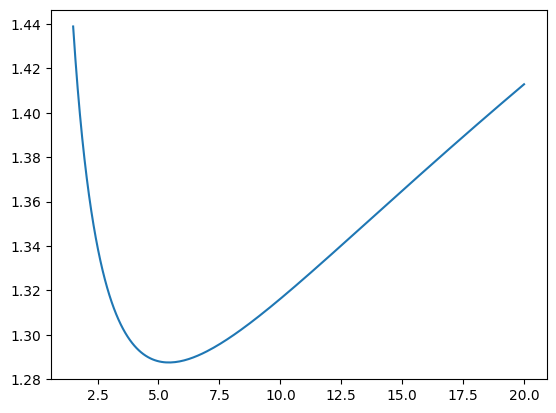

In [111]:
# Calcolo valori e grafico della funzione
xm = np.linspace(1.5, 20,200)
ym = fmin(xm)

#plt.subplots(figsize=(10,8))
plt.plot(xm,ym)

In [112]:
# Definisco gamma e valori iniziali (xm0, xm1)

gamma1 = 20
gamma2 = 200

xm0 = 2
xm1 = 3

xmsteps1 = np.array([xm0, xm1])
xmsteps2 = np.array([xm0, xm1])

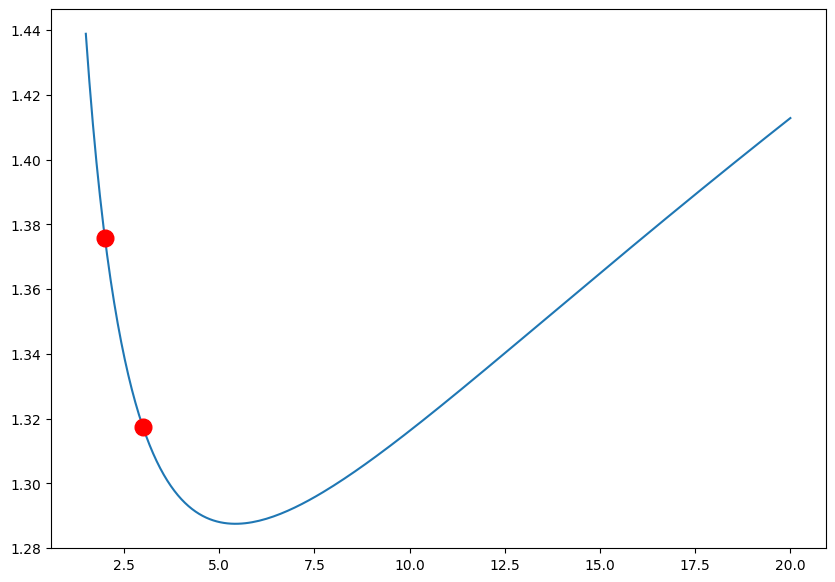

In [143]:
# Grafico funzione con valori di f(xm0) e f(xm1) evidenziati 
plt.subplots(figsize=(10,7))
plt.plot(xm,ym)

plt.plot(xm0, fmin(xm0), 'o', markersize=12, color='red')
plt.plot(xm1, fmin(xm1), 'o', markersize=12, color='red')

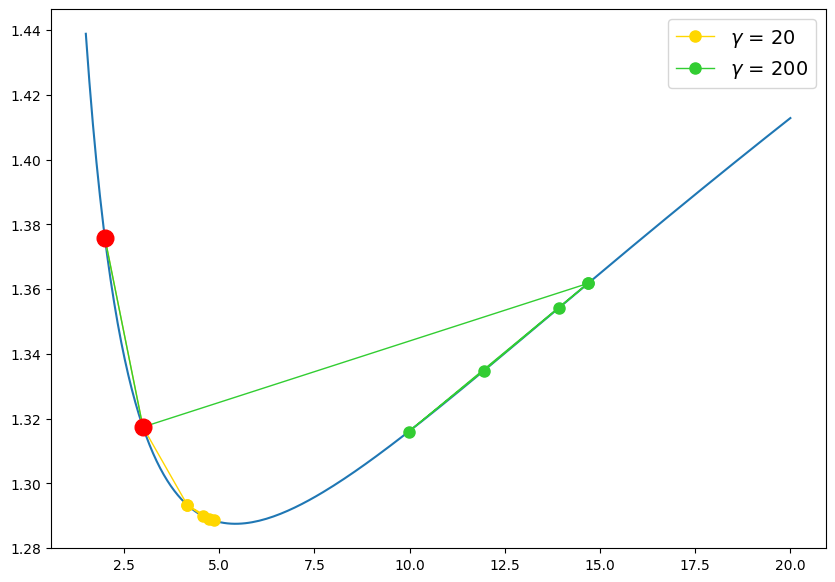

In [144]:
# calcolo xm2 a partire da xm0 e xm1
xm2 = xm1 - gamma1 * (fmin(xm1) - fmin(xm0))/(xm1-xm0)
xmsteps1 = np.append(xmsteps1, xm2)

xm2 = xm1 - gamma2 * (fmin(xm1) - fmin(xm0))/(xm1-xm0)
xmsteps2 = np.append(xmsteps2, xm2)

# Grafico funzione con valore funzione in xm0, xm1,xm2
#   per diversi valori di gamma
plt.subplots(figsize=(10,7))
plt.plot(xm,ym)

plt.plot(xmsteps1, fmin(xmsteps1), 'o-', color='gold',      linewidth=1,  
         markersize=8, label='$\gamma$ = {:}'.format(gamma1))
plt.plot(xmsteps2, fmin(xmsteps2), 'o-', color='limegreen', linewidth=1,  
         markersize=8, label='$\gamma$ = {:}'.format(gamma2))
plt.plot(xm0, fmin(xm0), 'o', markersize=12,  color='red')
plt.plot(xm1, fmin(xm1), 'o', markersize=12,  color='red')

plt.legend(fontsize=14)
plt.show()

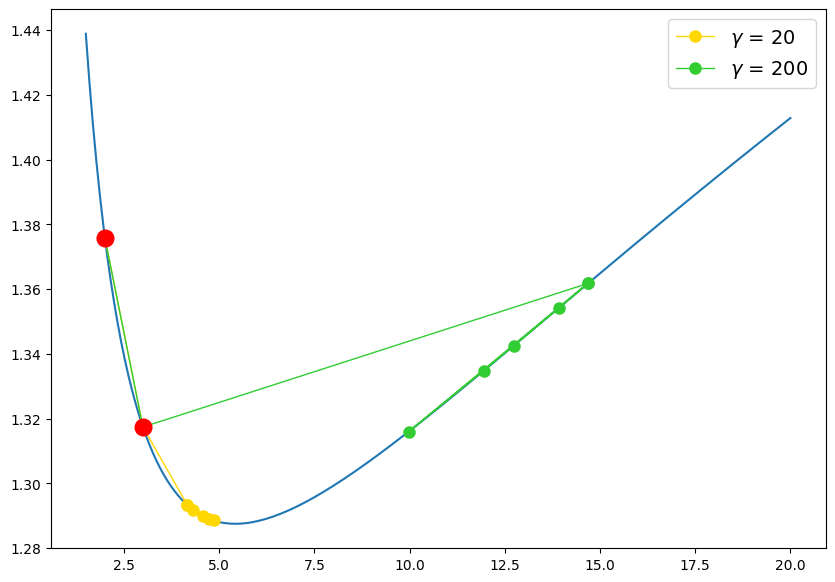

In [145]:
# calcolo xm3 a partire da xm1 e xm2
xm3 = xmsteps1[-1] - gamma1 * (fmin(xmsteps1[-1]) - fmin(xmsteps1[-2]))/(xmsteps1[-1]-xmsteps1[-2])
xmsteps1 = np.append(xmsteps1, xm3)

xm3 = xmsteps2[-1] - gamma2 * (fmin(xmsteps2[-1]) - fmin(xmsteps2[-2]))/(xmsteps2[-1]-xmsteps2[-2])
xmsteps2 = np.append(xmsteps2, xm3)


# Grafico funzione con valore funzione in xm0, xm1, ... xm3
#   per diversi valori di gamma
plt.subplots(figsize=(10,7))
plt.plot(xm,ym)

plt.plot(xmsteps1, fmin(xmsteps1), 'o-', color='gold',      linewidth=1,  
         markersize=8, label='$\gamma$ = {:}'.format(gamma1))
plt.plot(xmsteps2, fmin(xmsteps2), 'o-', color='limegreen', linewidth=1,  
         markersize=8, label='$\gamma$ = {:}'.format(gamma2))
plt.plot(xm0, fmin(xm0), 'o', markersize=12,  color='red')
plt.plot(xm1, fmin(xm1), 'o', markersize=12,  color='red')

plt.legend(fontsize=14)


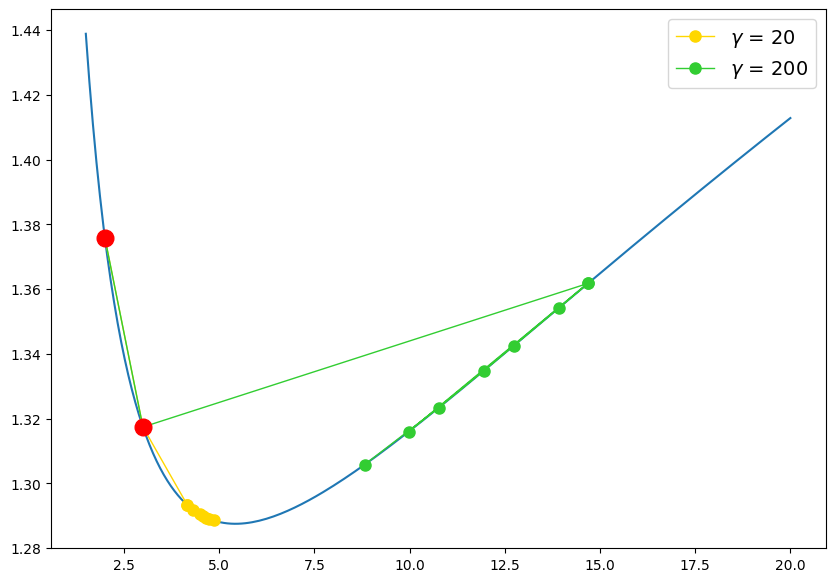

In [147]:
# calcolo xm4 a partire da xm2 e xm3
xm4 = xmsteps1[-1] - gamma1 * (fmin(xmsteps1[-1]) - fmin(xmsteps1[-2]))/(xmsteps1[-1]-xmsteps1[-2])
xmsteps1 = np.append(xmsteps1, xm4)

xm4 = xmsteps2[-1] - gamma2 * (fmin(xmsteps2[-1]) - fmin(xmsteps2[-2]))/(xmsteps2[-1]-xmsteps2[-2])
xmsteps2 = np.append(xmsteps2, xm4)

# Grafico funzione con valore funzione in xm0, xm1, ... xm4
#   per diversi valori di gamma
plt.subplots(figsize=(10,7))
plt.plot(xm,ym)

plt.plot(xmsteps1, fmin(xmsteps1), 'o-', color='gold',      linewidth=1,  
         markersize=8, label='$\gamma$ = {:}'.format(gamma1))
plt.plot(xmsteps2, fmin(xmsteps2), 'o-', color='limegreen', linewidth=1,  
         markersize=8, label='$\gamma$ = {:}'.format(gamma2))
plt.plot(xm0, fmin(xm0), 'o', markersize=12,  color='red')
plt.plot(xm1, fmin(xm1), 'o', markersize=12,  color='red')

plt.legend(fontsize=14)


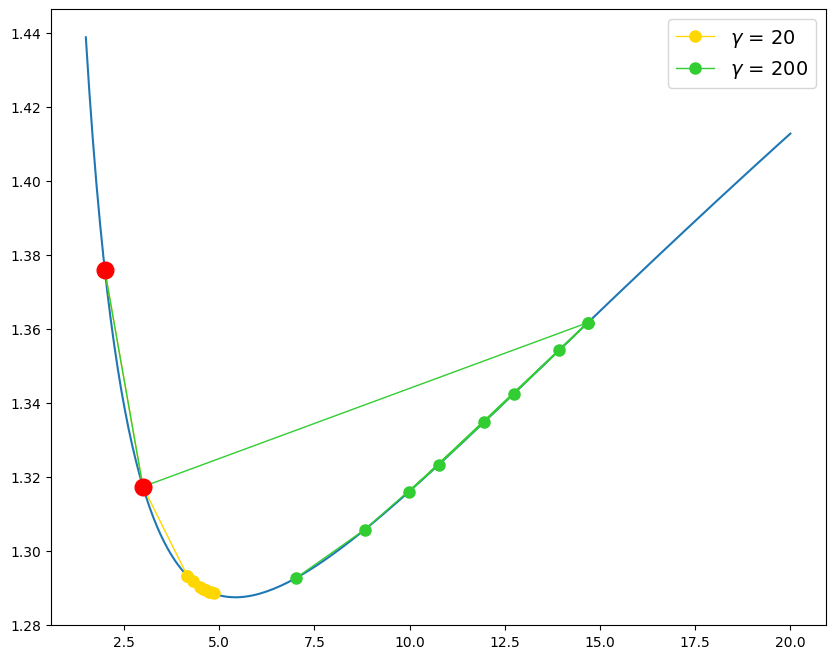

In [148]:
# calcolo xm5 a partire da xm3 e xm4
xm5 = xmsteps1[-1] - gamma1 * (fmin(xmsteps1[-1]) - fmin(xmsteps1[-2]))/(xmsteps1[-1]-xmsteps1[-2])
xmsteps1 = np.append(xmsteps1, xm5)

xm5 = xmsteps2[-1] - gamma2 * (fmin(xmsteps2[-1]) - fmin(xmsteps2[-2]))/(xmsteps2[-1]-xmsteps2[-2])
xmsteps2 = np.append(xmsteps2, xm5)


# Grafico funzione con valore funzione in xm0, xm1, ... xm5
#   per diversi valori di gamma
plt.subplots(figsize=(10,8))
plt.plot(xm,ym)

plt.plot(xmsteps1, fmin(xmsteps1), 'o-', color='gold',      linewidth=1,  
         markersize=8, label='$\gamma$ = {:}'.format(gamma1))
plt.plot(xmsteps2, fmin(xmsteps2), 'o-', color='limegreen', linewidth=1,  
         markersize=8, label='$\gamma$ = {:}'.format(gamma2))
plt.plot(xm0, fmin(xm0), 'o', markersize=12,  color='red')
plt.plot(xm1, fmin(xm1), 'o', markersize=12,  color='red')

plt.legend(fontsize=14)

### Scipy Optimize

Il modulo `scipy.optimize` ha diversi metodi per l'ottimizzazione di parametri o la minimizzazione.
Tra questi:
* `minimize` può trovare il minimo di una funzione; 
* `root` può trovare la radice di una funzione;
* `curve_fit` può trovare i parametri di una funzione che meglio descivano un campione di dati (*fit*). 

Vengono utilizzate tecniche avanzate che derivano da e combinano i metodi base discussi sopra. 

In [118]:
from scipy import optimize

In [149]:
# Funzione polinomio di quarto grado 
def fp4(x, p ):
    """
    fp4(x, p ) funzione polinomioi di quarto grado
    return p0 x^2 + p1 x + p0
    """
    return p[0]*x**2 + p[1]*np.sin(p[2]*x) + p[3]

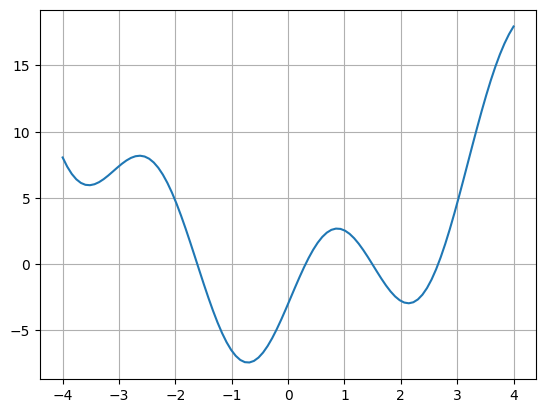

In [120]:
##  definizione parametri del pominomio di quaro grado e grafico 
ppar4 = np.array([
    1,
    5,
    2,
    -3
])
xp4 = np.linspace(-4, 4, 100)
yp4 = fp4(xp4, ppar4  )

plt.plot(xp4, yp4)
plt.grid()
plt.show()

#### minimize

In [121]:
rmin_m2 = optimize.minimize(fp4, x0=-2, args=ppar4, method="L-BFGS-B")
rmin_m2

      fun: -7.439314132868537
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.88178415e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-0.7137759])

In [122]:
# Ricrac minimo con diversi punti di partenza
rmin_0 = optimize.minimize(fp4, x0=0, args=ppar4)
rmin_0

rmin_p3 = optimize.minimize(fp4, x0=3, args=ppar4)
#rmin_p3

In [123]:
#print(rmin_p2.x[0])

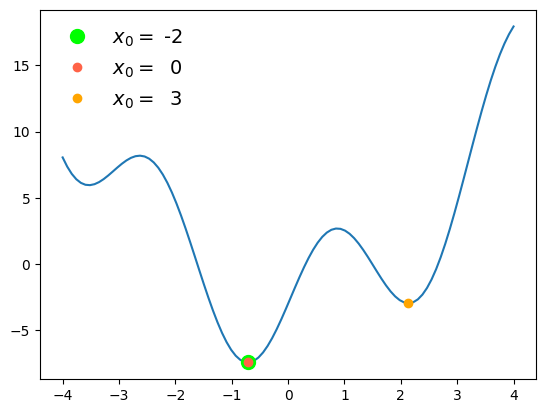

In [124]:
# Plot minimi trovato 
plt.plot(xp4, yp4)

plt.plot(rmin_m2.x[0], fp4(rmin_m2.x[0], ppar4), 'o', color='lime',   markersize=10, label='$x_0 = $ -2')
plt.plot(rmin_0.x[0],  fp4(rmin_0.x[0], ppar4),  'o', color='tomato', label='$x_0 = $  0')
plt.plot(rmin_p3.x[0], fp4(rmin_p3.x[0], ppar4), 'o', color='orange', label='$x_0 = $  3')
plt.legend(frameon=False, fontsize=14)


#### root

In [150]:
# Ricerca radice
root_m2 = optimize.root(fp4, x0=-2, args=ppar4 )
root_m2

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([7.17236759e-09])
       r: array([13.18977922])
  status: 1
 success: True
       x: array([-1.61123316])

In [151]:
# Ricerca radice con diversi punti di partenza
root_0  = optimize.root(fp4, x0=0, args=ppar4 )
root_p3 = optimize.root(fp4, x0=3, args=ppar4 )

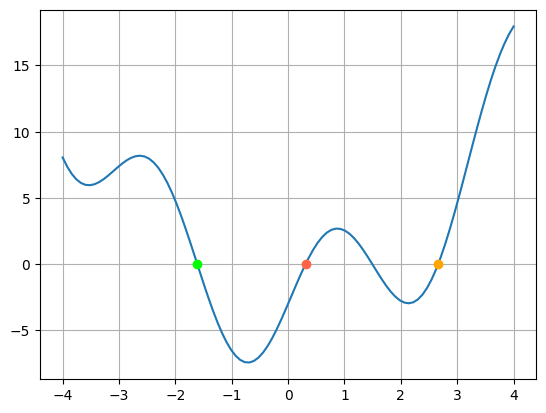

In [127]:
# Plot radici trovate
plt.plot(xp4, yp4)
plt.plot(root_m2.x[0],  fp4(root_m2.x[0], ppar4),  'o', color='lime',   label='$x_0 = $ -2')
plt.plot(root_0.x[0],   fp4(root_0.x[0],  ppar4),  'o', color='tomato', label='$x_0 = $  0')
plt.plot(root_p3.x[0],  fp4(root_p3.x[0], ppar4),  'o', color='orange', label='$x_0 = $  3')
plt.grid()

#### curve_fit


Per trovare i parametri di una funzine  che meglio descrivono una serie di dati si può  utilizzare la funzione `curve_fit` di `scipy`.  La funzione da ottimizzare va definita con i parameytri elencati esplicitamente (non in un array). 

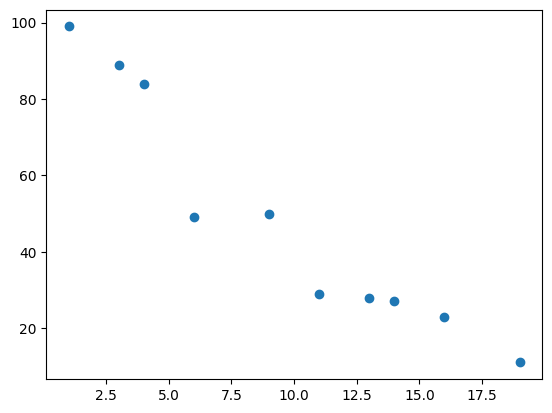

In [128]:
# Dati
xdata = np.array([ 1,    3,    4,  6,  9,  11, 13, 14, 16, 19]) 
ydata = np.array([ 99,  89,   84, 49, 50, 29, 28, 27, 23,  11])
yerr  = np.array([ 15,   12,  10,  9,  8,  6,  5,  5,  4,   3])


plt.plot(xdata, ydata, 'o')


In [129]:
def fexp(x, A, tau):
    """ 
    Fnzione esponenziale f(x) = A*e^(-x/tau)
    A   : valore della funzionea t=0 
    tau : costante di tempo
    """
    return A*np.exp(-x/tau)

In [156]:
# Fit per trovare parametri
pstart = np.array([10, 1])
params, params_covariance = optimize.curve_fit(fexp, xdata, ydata, p0=[pstart])

print('params', params )
print('params_cov', params_covariance)
print('errori params', np.sqrt(params_covariance.diagonal()))

params [116.14394111   9.17144608]
params_cov [[42.91414238 -4.09111438]
 [-4.09111438  0.7003829 ]]
errori params [6.55088867 0.83688882]


`curve_fit` restituisce:
* un array con il valore ottimizzato dei parametri (`params` nel nostro esempio) nell'ordine in cui sono definiti nella funzione soggetta al fit;
* la matrice di covarianza dei parametri ottimizzati (`params_covariance` nel nostro esempio) per cui la diagonale principale contine la varianza dei paramtri: l'incertazza sul parametro $p_i$ corrisponde alla radice dell'elemento diagonale $cov_{ii}$ ($\sigma_i = \sqrt{ cov_{ii} }$).

A   = 116 +- 7
tau = 9.2 +- 0.8


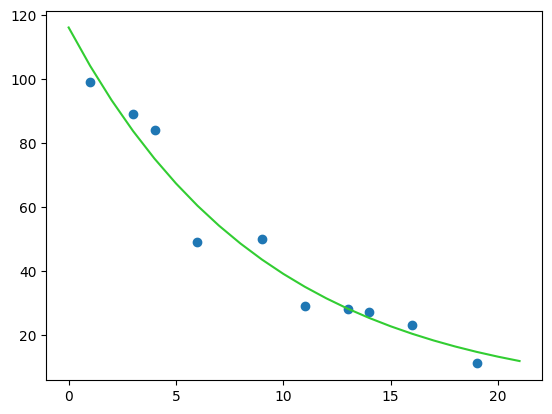

In [157]:
## Controllo risultato fit
xtest = np.arange(0, 22)
ytest = fexp(xtest, params[0], params[1])

plt.plot(xdata, ydata, 'o')
plt.plot(xtest, ytest, color='limegreen')

#print('A   = {:3.0f} +- {:1.0f}'.format(round(params[0]), round(math.sqrt(params_covariance[0,0]))) )
print('A   = {:3.0f} +- {:1.0f}'.format(params[0], math.sqrt(params_covariance[0,0])) ) 
print('tau = {:3.1f} +- {:1.1f}'.format(params[1], math.sqrt(params_covariance[1,1])) )

In [158]:
# Fit per trovare parametri con errore sulla y
pstart = np.array([10, 1])
paramse, paramse_covariance = optimize.curve_fit(fexp, xdata, ydata, sigma=yerr, absolute_sigma=True, p0=[pstart])

print('params', params )
print('params_cov', params_covariance)

params [116.14394111   9.17144608]
params_cov [[42.91414238 -4.09111438]
 [-4.09111438  0.7003829 ]]


 --- Parametri senza erorri sui punti ---
     A   = 116 +- 7
     tau = 9.2 +- 0.8
 --- Parametri con  erorri sui punti ---
     A   = 119 +- 11
     tau = 8.8 +- 0.7


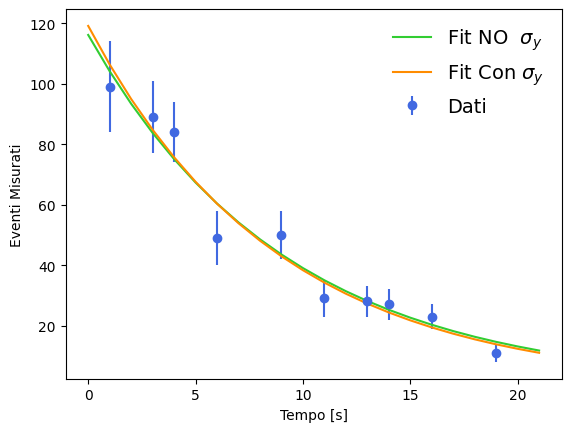

In [159]:
## Controllo risultato fit con errore
xteste = np.arange(0, 22)
yteste = fexp(xteste, paramse[0], paramse[1])

plt.errorbar(xdata, ydata,  yerr=yerr, color='royalblue', fmt='o', label='Dati')
plt.plot(xtest,  ytest,  color='limegreen' , label='Fit NO  $\sigma_y$')
plt.plot(xteste, yteste, color='darkorange', label='Fit Con $\sigma_y$')
plt.legend(fontsize=14, frameon=False)
plt.xlabel('Tempo [s]')
plt.ylabel('Eventi Misurati')
#print('A   = {:3.0f} +- {:1.0f}'.format(round(params[0]), round(math.sqrt(params_covariance[0,0]))) )
print(' --- Parametri senza erorri sui punti ---')
print('     A   = {:3.0f} +- {:1.0f}'.format(params[0], math.sqrt(params_covariance[0,0])) ) 
print('     tau = {:3.1f} +- {:1.1f}'.format(params[1], math.sqrt(params_covariance[1,1])) )
print(' --- Parametri con  erorri sui punti ---')
print('     A   = {:3.0f} +- {:1.0f}'.format(paramse[0], math.sqrt(paramse_covariance[0,0])) ) 
print('     tau = {:3.1f} +- {:1.1f}'.format(paramse[1], math.sqrt(paramse_covariance[1,1])) )

In [134]:
# Calcolo Chi quadrato
# Valore funzine fit ottimizzata in corrispondneza dei tempi dei dati
yfit = fexp(xdata, paramse[0], paramse[1])

# chi2
chi2 =  np.sum( (yfit - ydata)**2 /ydata ) 

# gradi di libertà
ndof = len(xdata)-len(paramse)

print('Chi2 / ndf: {:4.2f} / {:d} = {:2.3f}'.format( chi2, ndof, chi2/ndof ) )

Chi2 / ndf: 7.69 / 8 = 0.961


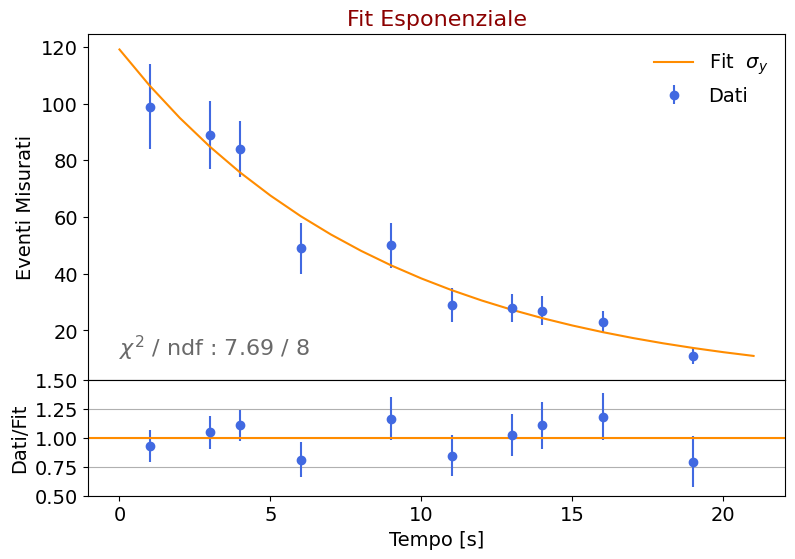

In [135]:
##############################################
# Grafico con Rapporto Dati/Fit
##############################################

# Grafico con due subplot
fig, ax = plt.subplots(2,1, figsize=(9,6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
# Rimuovo spazio verticale fra i subplot
fig.subplots_adjust(hspace=0)

# Grafico subplot 0 (dati e funzione di fit)
ax[0].set_title('Fit Esponenziale', fontsize=16, color='darkred')
ax[0].errorbar(xdata,  ydata,  yerr=yerr, color='royalblue', fmt='o', label='Dati')
ax[0].plot(    xteste, yteste,            color='darkorange' ,        label='Fit  $\sigma_y$')
ax[0].set_ylabel('Eventi Misurati', fontsize=14)
ax[0].tick_params(axis="y", labelsize=14) 
ax[0].legend(fontsize=14, frameon=False)
ax[0].text(0, min(ydata), r'$\chi^2$ / ndf : {:3.2f} / {:d}'.format(chi2, ndof), fontsize=16, color='dimgray')

# Grafico subplot 1 (rapporto dati / funzione di fit)
ax[1].errorbar(xdata,  ydata/yfit, yerr=yerr/yfit, fmt='o', color='royalblue' )
ax[1].axhline(1, color='darkorange') 
ax[1].set_xlabel('Tempo [s]', fontsize =14)
ax[1].set_ylabel('Dati/Fit',  fontsize =14)
ax[1].tick_params(axis="x",   labelsize=14) 
ax[1].tick_params(axis="y",   labelsize=14) 
ax[1].set_ylim(0.5,1.5)       
ax[1].set_yticks(np.arange(0.5, 1.51, 0.25))
ax[1].grid(True, axis='y')
# Salvo immagine grafico come file .png e .pdf 
#plt.savefig('exponential_fit.png')
#plt.savefig('exponential_fit.pdf')
plt.show()